In [1]:
import os
import numpy
import progressbar
from IPython.display import Video
from matplotlib import pyplot
import matplotlib.animation as animation
from functions import function_assemble_raw_data

In [2]:
if os.path.exists('data/ersst_v5.npz'):
    pass
else:
    function_assemble_raw_data()
rawdata = numpy.load('data/ersst_v5.npz', allow_pickle=True)

In [3]:
dict_sea_surface_temperature_data \
    = rawdata['dict_sea_surface_temperature_data'].all()
array_longitude_bin_edge_index \
    = rawdata['array_longitude_bin_edge_index']
array_longitude_bin_edge \
    = rawdata['array_longitude_bin_edge']
array_latitude_bin_edge_index \
    = rawdata['array_latitude_bin_edge_index']
array_latitude_bin_edge \
    = rawdata['array_latitude_bin_edge']
array_longitude_bin_center_index \
    = rawdata['array_longitude_bin_center_index']
array_longitude_bin_center \
    = rawdata['array_longitude_bin_center']
array_latitude_bin_center_index \
    = rawdata['array_latitude_bin_center_index']
array_latitude_bin_center \
    = rawdata['array_latitude_bin_center']

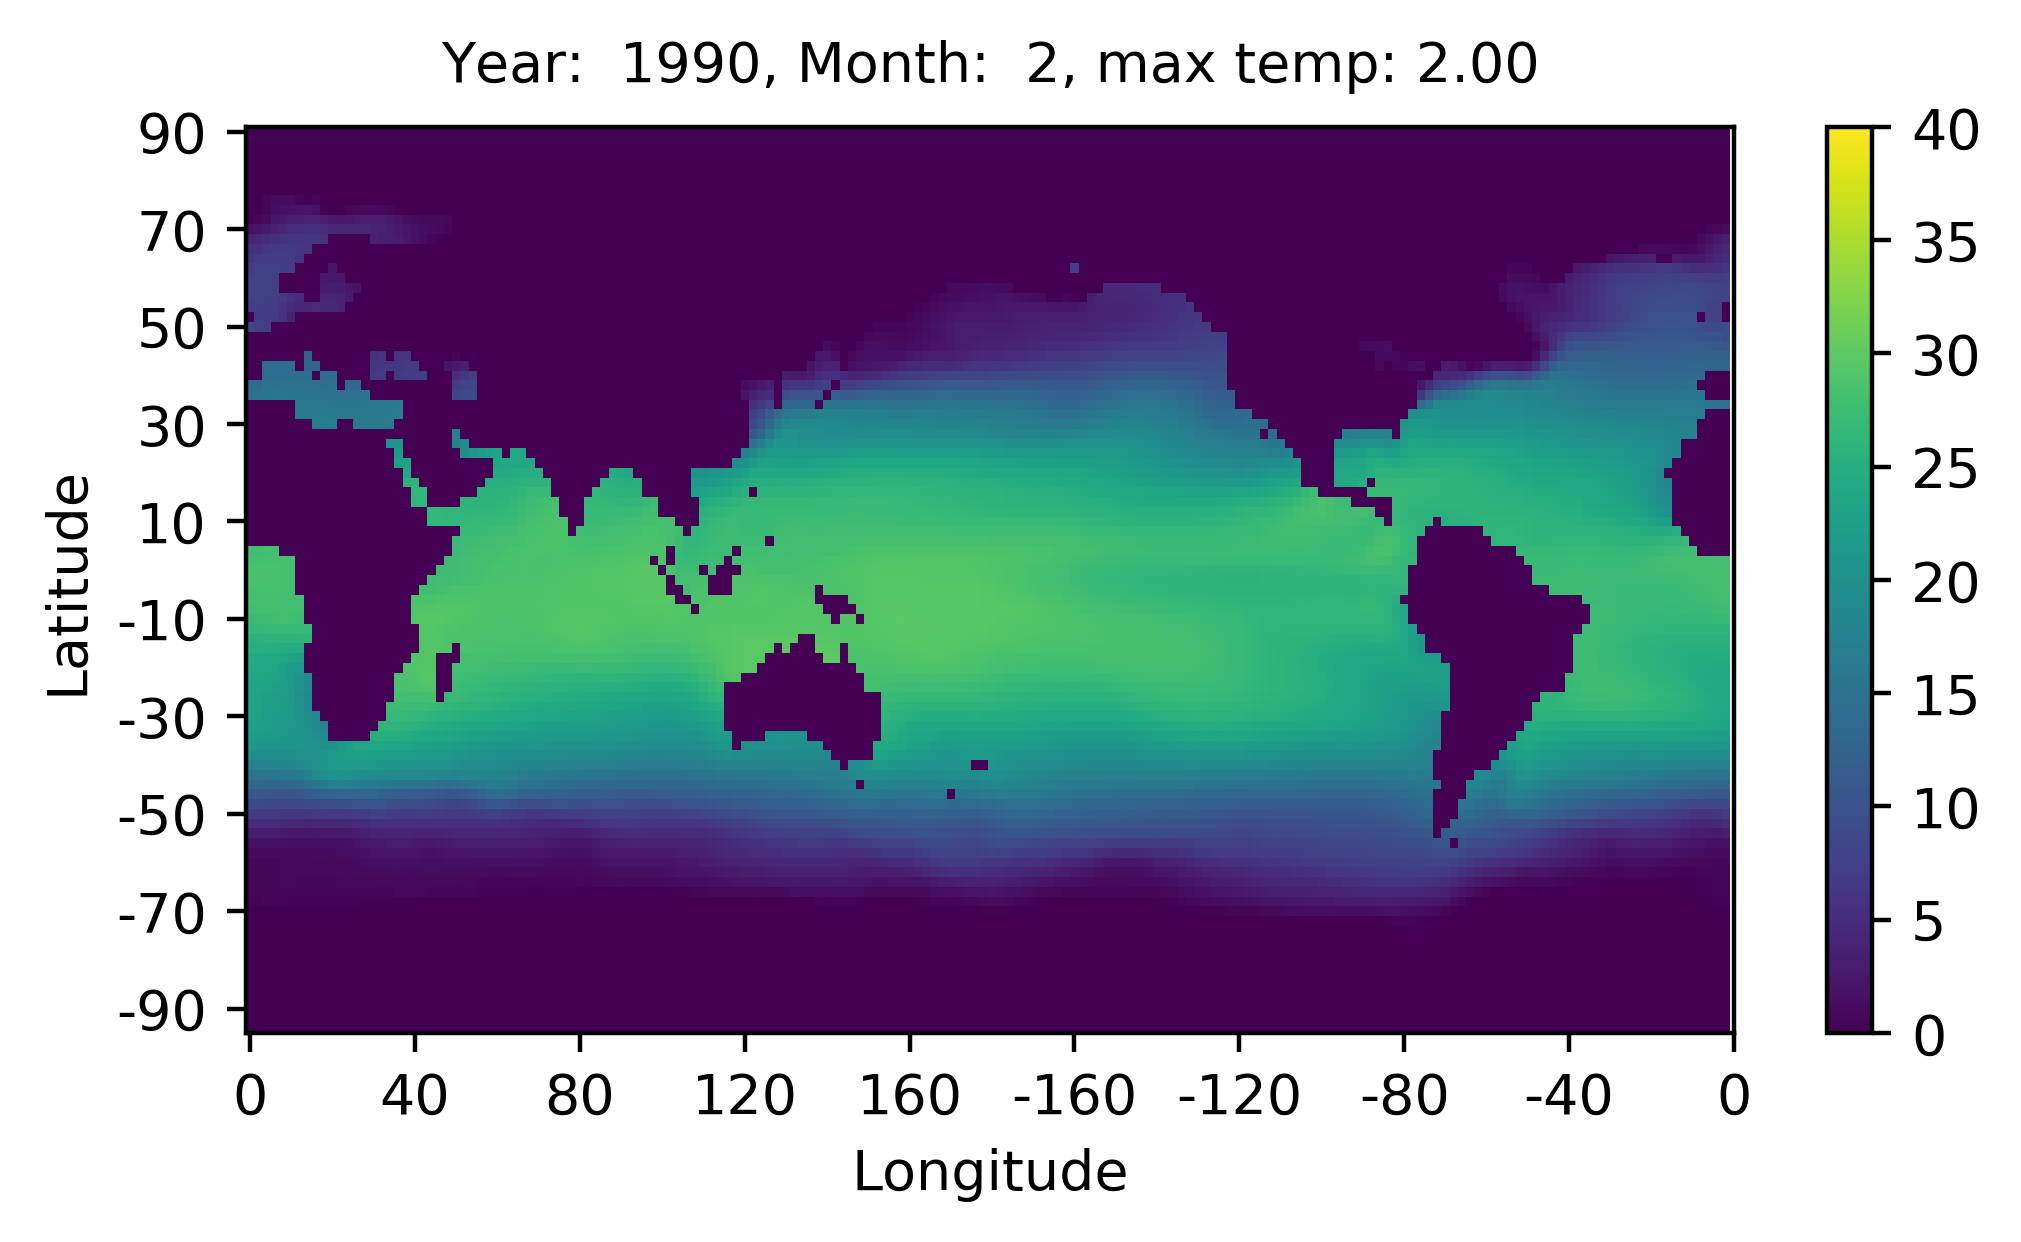

In [46]:
int_interval_lat = 10
temp_array_xlabels = numpy.arange(0, 361, 40)
for i_index in range(temp_array_xlabels.size):
    if temp_array_xlabels[i_index] > 180:
        temp_array_xlabels[i_index] -= 360
pyplot.figure(figsize = (6,3), dpi = 400, facecolor = 'white')
figure_ax = pyplot.axes()
int_month = 2
int_year = 1990
array2d_monthly_data \
    = dict_sea_surface_temperature_data['{}'.format(int_year)][int_month - 1]
array2d_monthly_data \
    = numpy.append(array2d_monthly_data[:,:1], array2d_monthly_data, axis = 1)
array2d_monthly_data \
    = numpy.append(array2d_monthly_data, array2d_monthly_data[:,-1:], axis = 1)
figure_img = pyplot.imshow(numpy.flipud(array2d_monthly_data.T), aspect='auto')
pyplot.xticks(
    ticks = range(0, 181, 20), 
    labels = temp_array_xlabels)
pyplot.yticks(
    ticks = array_latitude_bin_edge_index[::int_interval_lat], 
    labels = numpy.flipud(array_latitude_bin_edge[::int_interval_lat] + 1))
pyplot.ylabel('Latitude')
pyplot.xlabel('Longitude')
pyplot.colorbar()
pyplot.clim([0,40])

str_title \
    = 'Year:  {}, '.format(int_year) \
    + 'Month: {:2.0f}'.format(int_month) \
    + ', max temp: {:.2f}'.format(int_month,array2d_monthly_data.max())
title = figure_ax.text(
        0.5,1.05, str_title, 
        bbox={'facecolor':'w', 'alpha':0.0, 'pad':5},
        transform=figure_ax.transAxes, ha="center")
pyplot.show()


Done!


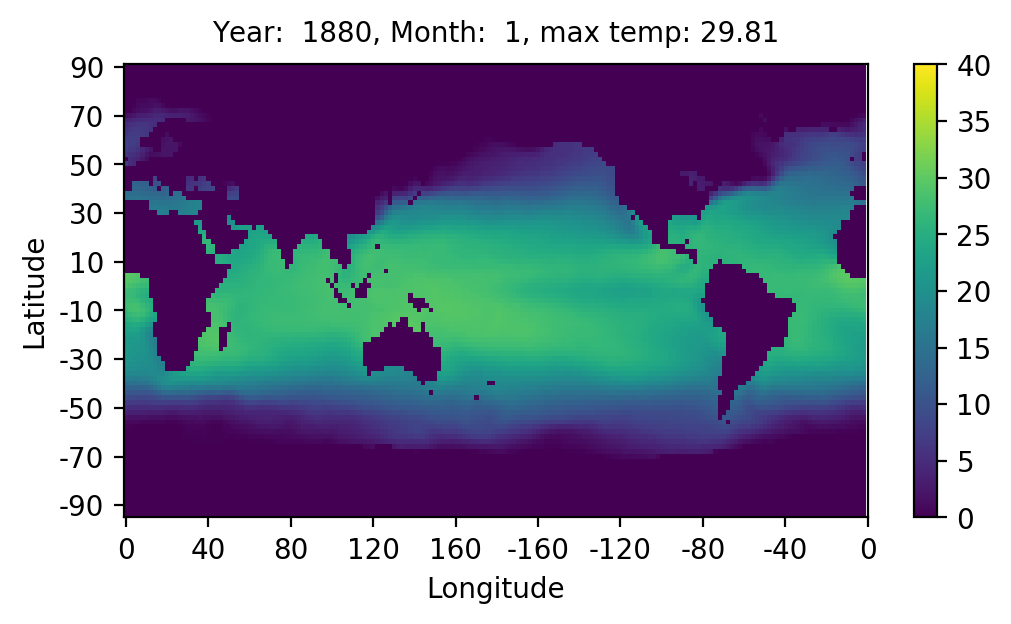

In [58]:

fps = 30
nSeconds = 1
# First set up the figure, the axis, and the plot element we want to animate

int_year = 1880 
int_month = 1
array2d_monthly_data \
    = dict_sea_surface_temperature_data['{}'.format(int_year)][int_month - 1]
array2d_monthly_data \
    = numpy.append(array2d_monthly_data[:,:1], array2d_monthly_data, axis = 1)
array2d_monthly_data \
    = numpy.append(array2d_monthly_data, array2d_monthly_data[:,-1:], axis = 1)
figure = pyplot.figure(figsize = (6,3), dpi = 200, facecolor = 'white')
figure_ax = pyplot.axes()
figure_im = pyplot.imshow(numpy.flipud(array2d_monthly_data.T), aspect='auto')
pyplot.xticks(
    ticks = range(0, 181, 20), 
    labels = temp_array_xlabels)
pyplot.yticks(
    ticks = array_latitude_bin_edge_index[::int_interval_lat], 
    labels = numpy.flipud(array_latitude_bin_edge[::int_interval_lat] + 1))
pyplot.ylabel('Latitude')
pyplot.xlabel('Longitude')
pyplot.colorbar()
pyplot.clim([0,40])

str_title \
    = 'Year:  {}, '.format(int_year) \
    + 'Month: {:2.0f}'.format(int_month) \
    + ', max temp: {:.2f}'.format(array2d_monthly_data.max())
title \
    = figure_ax.text(
        0.5,1.05, str_title, 
        bbox={'facecolor':'w', 'alpha':0.0, 'pad':5},
        transform=figure_ax.transAxes, ha="center")

def animate_func(i_frame):
    int_year = i_frame // 12 + 1880
    int_month = i_frame % 12 + 1
    array2d_monthly_data \
        = dict_sea_surface_temperature_data['{}'.format(int_year)][int_month - 1]
    array2d_monthly_data \
        = numpy.append(array2d_monthly_data[:,:1], array2d_monthly_data, axis = 1)
    array2d_monthly_data \
        = numpy.append(array2d_monthly_data, array2d_monthly_data[:,-1:], axis = 1)
    figure_im.set_array(numpy.flipud(array2d_monthly_data.T))
    str_title \
        = 'Year:  {}, '.format(int_year) \
        + 'Month: {:2.0f}'.format(int_month) \
        + ', max temp: {:.2f}'.format(array2d_monthly_data.max())
    title.set_text(str_title)
    return [figure_im ]
anim = animation.FuncAnimation(
                               figure, 
                               animate_func, 
                               frames = (2019 - 1880) * 12,
                               interval = 10 / fps, # in ms
                               )
writer = animation.FFMpegFileWriter()
anim.save('animation_temperature_variation.mp4', writer = writer)
print('Done!')

In [60]:
Video("animation_temperature_variation.mp4")